In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import iqr
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#Import dataset 
df = pd.read_csv("creditcard.csv", delimiter=',')

# take a look at the dataset
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.info()
#identify data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# summarize the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
#check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.isnull().values.any()
#check for any nan

False

0    284315
1       492
Name: Class, dtype: int64


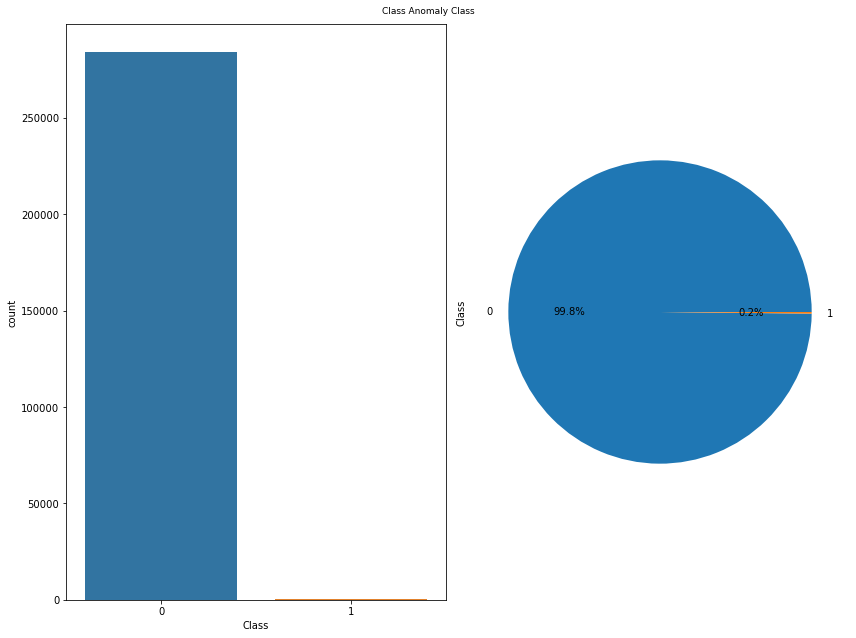

In [7]:
#users count by class
print(df.Class.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,9))
    f.suptitle(d.name+' Anomaly Class',fontsize=9)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(df['Class'])

### Subsample
The reason behind subsampling is the fear of overfitting given over 95% of the dataset is of non-fraud. Therefore in predict fraud class "1" this might be difficult. Therefore to somewhat balance the equation a subsample of the master dataset is used whereby there is an equal representation of both class which in turns leads to a better prediction.

In [8]:
# Since most of the data we have has already been scaled, we scale the columns we have got left

from sklearn.preprocessing import StandardScaler, RobustScaler

#Robust Scaler is less prone to outliers

std_scaler= StandardScaler()
rob_scaler=RobustScaler()

df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_time  scaled_amount  
0 -0.189115  0.133558 -0.021053      0    -0.994983       1.783274  
1  0.125895 -0.008983  0.014724      0    -0.994983      -0.269825  
2 -0.139097 -0.055353 -0.059752      0    -0.994972       4.983721  
3 -0.221929  0.062723  0.061458      0    -0.994972       1.418291  
4  0.502292  0.219422  0.215153      0    -0.994960       0.670579  

[5 rows x 31 columns]

In [10]:
df=df.sample(frac=1)

fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]
normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

#Shuffle DataFrame rows
new_df=normal_distributed_df.sample(frac=1, random_state=42)
#With random_state=42 , we get the same train and test sets across different executions, but in this time, 
#the train and test sets are different from the previous case with random_state=0 .
#The train and test sets directly affect the model's performance score.
new_df.head()

V1        V2        V3        V4        V5        V6        V7  \
262291 -0.168137 -0.475874  0.519004 -0.688722 -1.912594 -0.060759 -0.313450   
120837 -5.140723  3.568751 -5.896245  4.164720 -4.091193 -1.989960 -5.472436   
90137  -6.059912  3.666316 -1.375324  0.935790 -2.056272  0.143218 -1.174900   
247673 -5.192496  3.164721 -5.047679  2.246597 -4.011781 -0.638908 -2.873463   
144104 -3.365265  2.928541 -5.660999  3.891160 -1.840375 -1.800887 -5.558679   

              V8        V9       V10  ...       V22       V23       V24  \
262291  0.146446 -2.730458  1.154518  ...  0.525209  0.395337  0.005728   
120837  2.422821 -2.909735 -6.287803  ...  0.118022 -0.332704  0.139941   
90137   1.350617  1.237945  2.756243  ...  0.058566  0.194590  0.164171   
247673  1.576318 -2.861986 -2.120458  ... -1.006617  0.774562  0.063397   
144104  2.402322 -2.848923 -5.995676  ... -0.102501 -0.606283 -0.743165   

             V25       V26       V27       V28  Class  scaled_time  \
262291 -0.647989  0.214403  0.085044  0.141195      0     0.889437   
120837  0.324758 -0.180769  0.177810  0.661555      1    -0.102374   
90137   0.066522 -0.509446 -3.511483  0.228943      0    -0.256288   
247673 -0.390658  1.884741 -1.742558 -0.082216      1     0.810172   
144104  0.096319 -0.135060  1.238695  0.099824      1     0.013769   

        scaled_amount  
262291       2.249843  
120837       1.088521  
90137       -0.095438  
247673       3.156012  
144104      -0.293440  

[5 rows x 31 columns]

1    492
0    492
Name: Class, dtype: int64


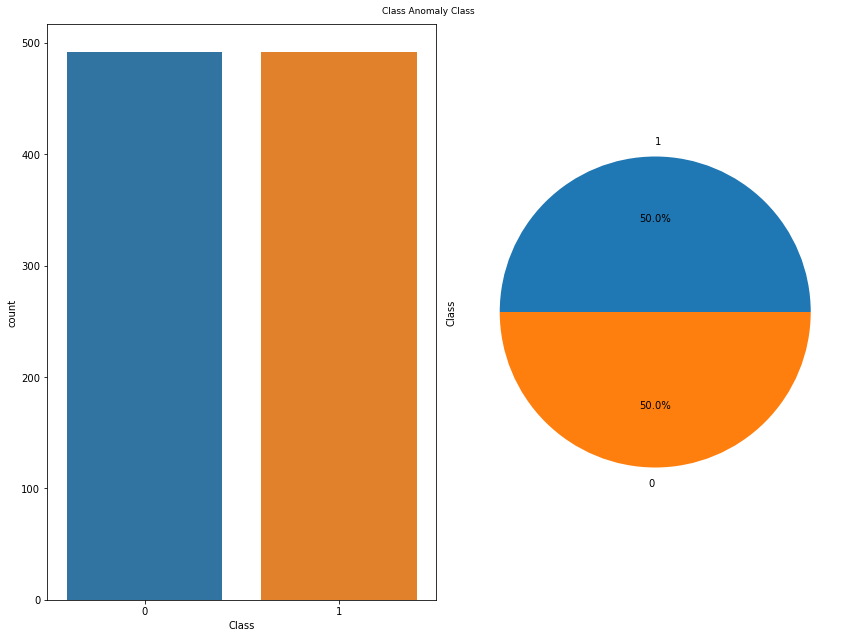

In [11]:
#users count by class after sampling
print(new_df.Class.value_counts())
#
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,9))
    f.suptitle(d.name+' Anomaly Class',fontsize=9)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()
plot_uni_cat(new_df['Class'])

In [12]:
#correlation matrix
corr = new_df.corr()
corr



V1        V2        V3        V4        V5        V6  \
V1             1.000000 -0.821166  0.879851 -0.610486  0.870631  0.323313   
V2            -0.821166  1.000000 -0.870935  0.688239 -0.806683 -0.290238   
V3             0.879851 -0.870935  1.000000 -0.769842  0.858389  0.476157   
V4            -0.610486  0.688239 -0.769842  1.000000 -0.586489 -0.431667   
V5             0.870631 -0.806683  0.858389 -0.586489  1.000000  0.314982   
V6             0.323313 -0.290238  0.476157 -0.431667  0.314982  1.000000   
V7             0.886434 -0.856465  0.891152 -0.709396  0.850937  0.280709   
V8            -0.078712 -0.027446 -0.169563  0.099344 -0.202476 -0.564445   
V9             0.656489 -0.701277  0.767759 -0.788696  0.666338  0.388244   
V10            0.738076 -0.770878  0.856274 -0.793025  0.757741  0.435507   
V11           -0.522574  0.619897 -0.717233  0.798979 -0.534323 -0.505570   
V12            0.590397 -0.671068  0.762802 -0.834494  0.621103  0.508613   
V13           -0.046579  0.044605 -0.078154  0.067747 -0.130555 -0.091953   
V14            0.440620 -0.569458  0.657206 -0.795643  0.434375  0.541595   
V15            0.107794 -0.153402  0.127600 -0.107600  0.081634 -0.090009   
V16            0.636713 -0.637682  0.728516 -0.725448  0.696184  0.443071   
V17            0.674426 -0.645527  0.738889 -0.711467  0.749285  0.430518   
V18            0.676835 -0.621896  0.706625 -0.640283  0.750132  0.364777   
V19           -0.299507  0.217085 -0.310580  0.315470 -0.404686 -0.209727   
V20           -0.312903  0.325611 -0.369828  0.299457 -0.327581 -0.149504   
V21            0.005281  0.052835  0.028926 -0.029088  0.037824  0.035571   
V22           -0.044052 -0.014253 -0.082508  0.146174 -0.106774 -0.015945   
V23           -0.047540  0.151722 -0.029290  0.007896 -0.085453  0.315693   
V24           -0.072315  0.011516 -0.004647 -0.071182 -0.135135 -0.033241   
V25           -0.071253  0.118231 -0.087731 -0.009689 -0.081823 -0.131654   
V26            0.062425 -0.015418 -0.002642  0.125565  0.063755 -0.045702   
V27            0.195201 -0.157202  0.105136 -0.020617  0.189998 -0.159131   
V28            0.188666  0.014043  0.136594 -0.093196  0.182100 -0.044455   
Class         -0.429532  0.490339 -0.568560  0.707534 -0.377191 -0.415700   
scaled_time    0.222324 -0.207197  0.145465 -0.205967  0.269381  0.086692   
scaled_amount -0.025776 -0.215670 -0.006105  0.005775 -0.104021  0.114430   

                     V7        V8        V9       V10  ...       V22  \
V1             0.886434 -0.078712  0.656489  0.738076  ... -0.044052   
V2            -0.856465 -0.027446 -0.701277 -0.770878  ... -0.014253   
V3             0.891152 -0.169563  0.767759  0.856274  ... -0.082508   
V4            -0.709396  0.099344 -0.788696 -0.793025  ...  0.146174   
V5             0.850937 -0.202476  0.666338  0.757741  ... -0.106774   
V6             0.280709 -0.564445  0.388244  0.435507  ... -0.015945   
V7             1.000000  0.092582  0.765678  0.867548  ... -0.127044   
V8             0.092582  1.000000 -0.077520 -0.050705  ...  0.060996   
V9             0.765678 -0.077520  1.000000  0.850641  ... -0.268965   
V10            0.867548 -0.050705  0.850641  1.000000  ... -0.226917   
V11           -0.640908  0.168980 -0.700143 -0.803071  ...  0.042356   
V12            0.718437 -0.164702  0.771065  0.883382  ... -0.131171   
V13           -0.035366  0.274534 -0.051146 -0.056557  ... -0.016368   
V14            0.543012 -0.181728  0.686063  0.760667  ...  0.037598   
V15            0.174889  0.140821  0.103411  0.138093  ... -0.078407   
V16            0.747104 -0.168090  0.732779  0.855673  ... -0.113310   
V17            0.770088 -0.217557  0.763550  0.855647  ... -0.139382   
V18            0.763392 -0.180178  0.708205  0.805477  ... -0.134219   
V19           -0.349804  0.207000 -0.319437 -0.401305  ...  0.126180   
V20           -0.388401 -0.013703 -0.398159 -0.395648  ...  0.460619   
V21            0.031437 -0.148989  0.165904 

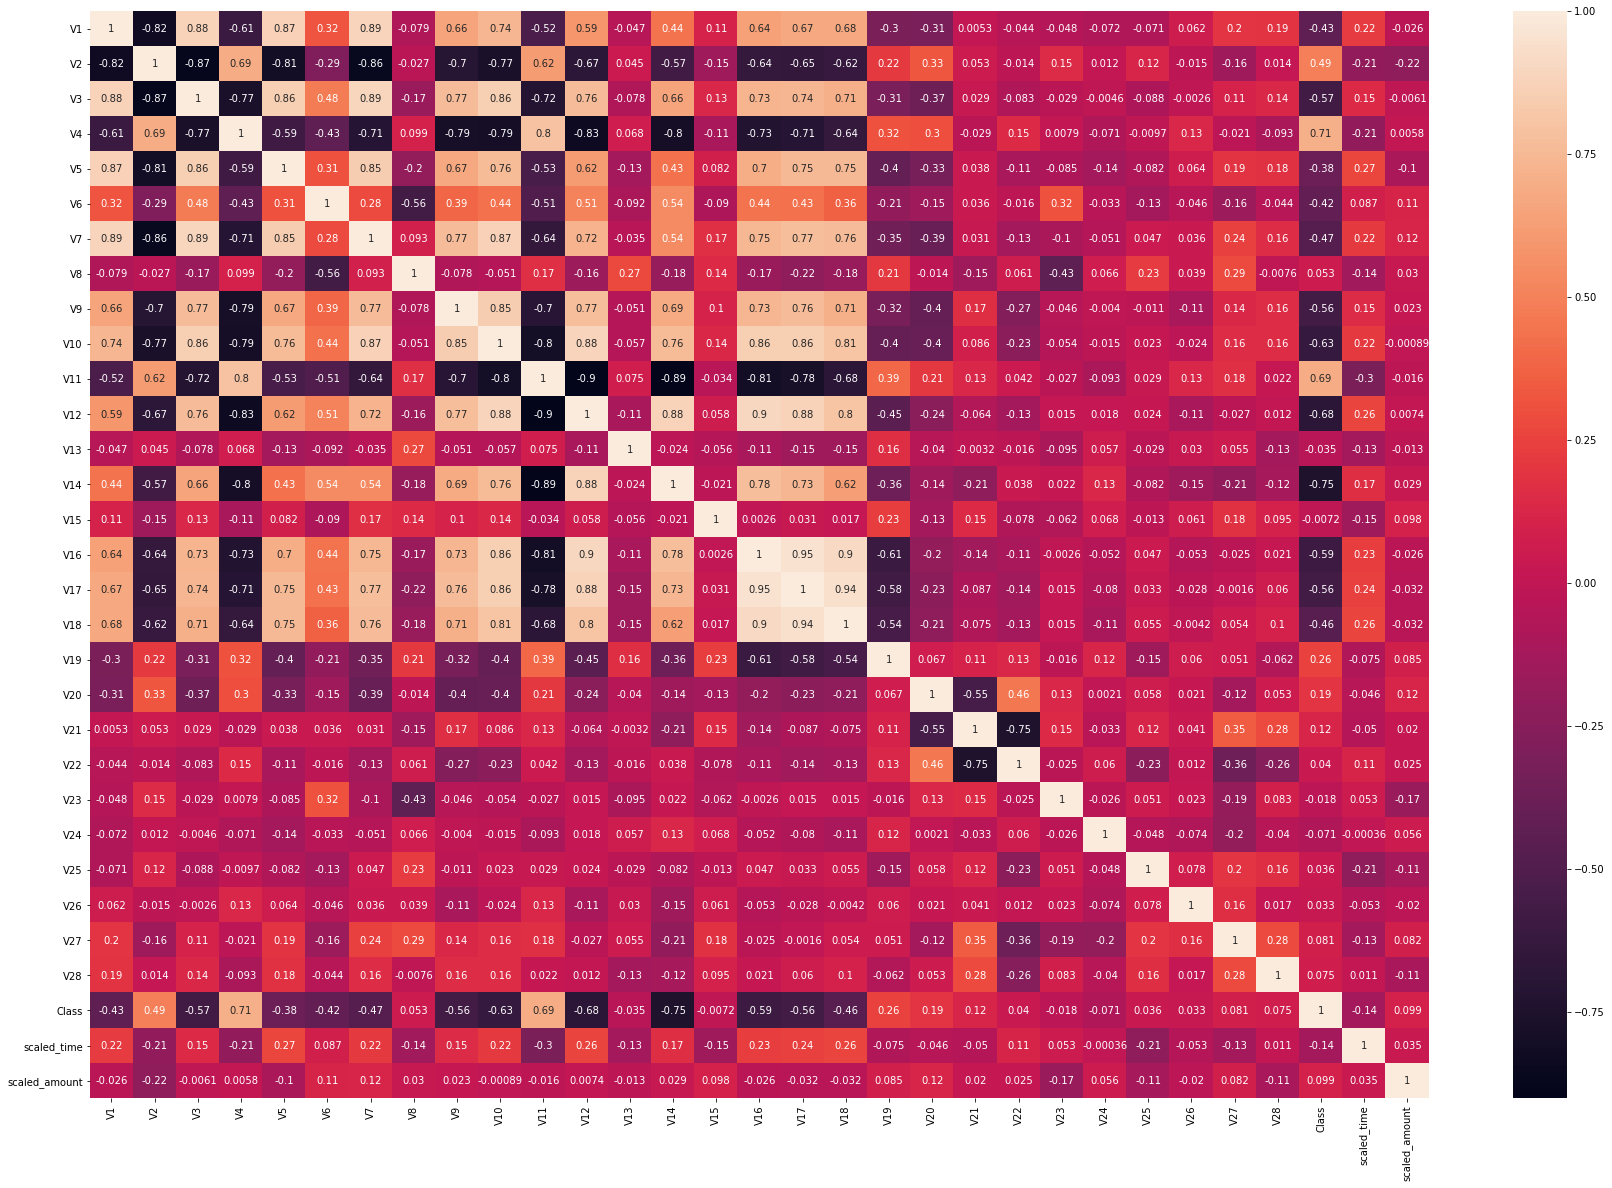

In [13]:
#corr matrix graph
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True)
plt.show()

The above correlation scores, shows the level of influence on the different features. Relating to the Class(i.e fraud anomaly) it can be identified V10, V12, V14, V16 have the highest negative correlation on class, whereas V4, V11, V2 have the highest positive correlation.

**BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.**

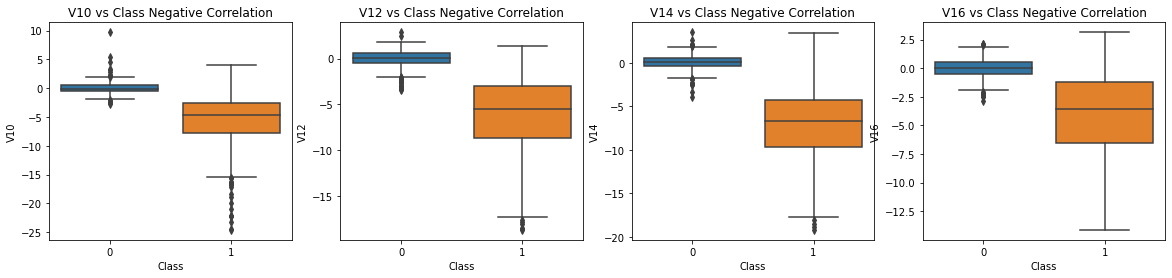

In [14]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=new_df,  ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=new_df,  ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=new_df,  ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')



plt.show()

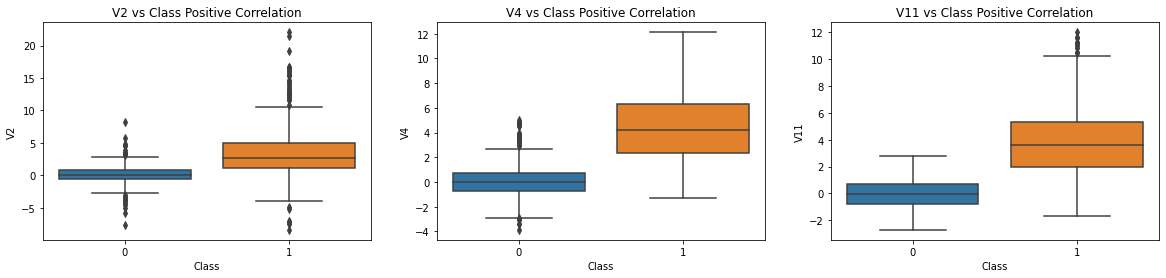

In [15]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))


# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df,  ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df,  ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

plt.show()

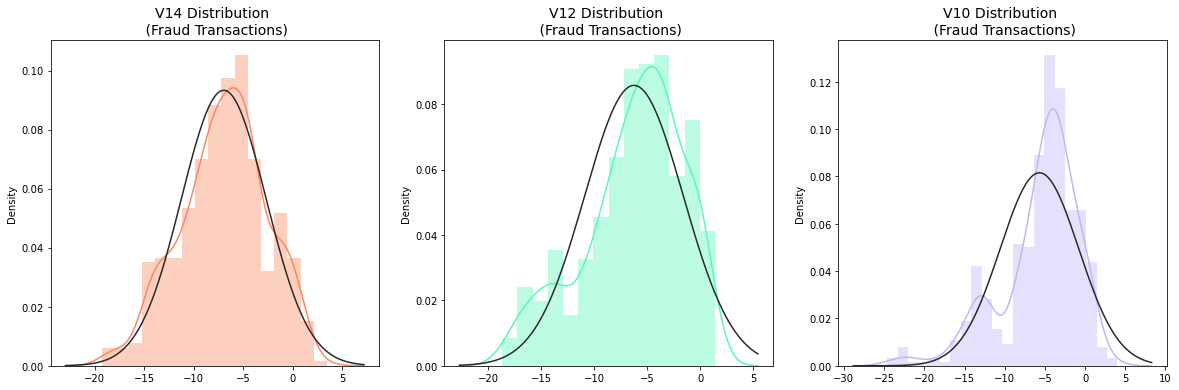

In [16]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### ML techniques applied

* Logistic Regression. 

* KNN. 

* DecisionTree. 

* Random Forest.

* Support Vector Machine.



In [17]:
#defining our X and Y variable(s) 
X = new_df.drop('Class', axis=1)
y = new_df['Class']




In [18]:
#separate the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (688, 30) (688,)
Test set: (296, 30) (296,)


### Logistic Regression

In [19]:
#modeling training using Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [20]:
#model prediction with test data
yhat = LR.predict(X_test)

In [21]:
yhat_prob = LR.predict_proba(X_test)

In [22]:
#model evaluation with usage of Jacard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8525641025641025

In [23]:
from sklearn import metrics
from sklearn.metrics import jaccard_score,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,yhat))
print("Accuracy:",metrics.accuracy_score(y_test,yhat))
print("Precision:",metrics.precision_score(y_test,yhat))
print("Recall:",metrics.recall_score(y_test,yhat))
print("F1-Score:",metrics.f1_score(y_test,yhat))

Confusion Matrix:
 [[133   6]
 [ 17 140]]
Accuracy: 0.9222972972972973
Precision: 0.958904109589041
Recall: 0.89171974522293
F1-Score: 0.9240924092409241


In [24]:
#model evaluation with usage of confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[140  17]
 [  6 133]]


Confusion matrix, without normalization
[[140  17]
 [  6 133]]


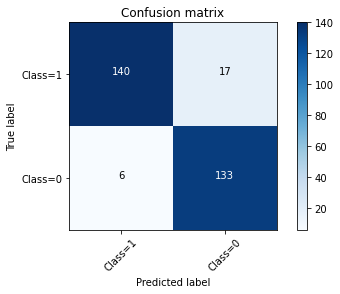

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix')

### Knearest neighbour 

In [26]:
#Predicition using Knearest neighbour 
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [27]:
k_yhat = neigh.predict(X_test)
k_yhat[0:5]

array([1, 0, 1, 1, 0])

In [28]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,k_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, k_yhat))
print("Precision:",metrics.precision_score(y_test,k_yhat))
print("Recall:",metrics.recall_score(y_test,k_yhat))
print("F1-Score:",metrics.f1_score(y_test,k_yhat))

Confusion Matrix:
 [[135   4]
 [ 20 137]]
Accuracy:  0.918918918918919
Precision: 0.9716312056737588
Recall: 0.8726114649681529
F1-Score: 0.9194630872483222


Confusion matrix, without normalization
[[137  20]
 [  4 135]]


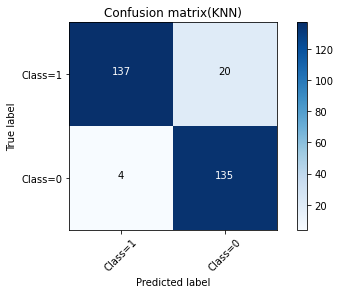

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, k_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix(KNN)')

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.91, 0.92, 0.92, 0.92, 0.93, 0.92, 0.92, 0.92, 0.92])

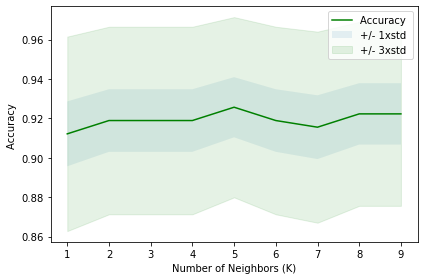

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Decision Tree 

In [32]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features=6 , max_depth=4)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [33]:
dt.score(X_train , y_train).round(5)

0.95785

In [34]:
dt.score(X_test , y_test).round(5)

0.89865

In [35]:
DT_yhat=dt.predict(X_test)

In [36]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,DT_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, DT_yhat))
print("Precision:",metrics.precision_score(y_test,DT_yhat))
print("Recall:",metrics.recall_score(y_test,DT_yhat))
print("F1-Score:",metrics.f1_score(y_test,DT_yhat))

Confusion Matrix:
 [[132   7]
 [ 23 134]]
Accuracy:  0.8986486486486487
Precision: 0.950354609929078
Recall: 0.8535031847133758
F1-Score: 0.8993288590604027


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(max_features=8 , max_depth=6)

In [38]:
Rf.fit(X_train, y_train)
Rf.score(X_train, y_train).round(5)

0.98256

In [39]:
Rf_yhat=Rf.predict(X_test)

In [40]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,Rf_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, Rf_yhat))
print("Precision:",metrics.precision_score(y_test,Rf_yhat))
print("Recall:",metrics.recall_score(y_test,Rf_yhat))
print("F1-Score:",metrics.f1_score(y_test,Rf_yhat))

Confusion Matrix:
 [[135   4]
 [ 19 138]]
Accuracy:  0.9222972972972973
Precision: 0.971830985915493
Recall: 0.8789808917197452
F1-Score: 0.9230769230769231


In [41]:
# "Support Vector Classifier"
clf = SVC(kernel='linear') 

In [42]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train).round(5)

0.9593

In [43]:
clf_yhat=clf.predict(X_test)

In [44]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,clf_yhat))
print("Accuracy: ", metrics.accuracy_score(y_test, clf_yhat))
print("Precision:",metrics.precision_score(y_test,clf_yhat))
print("Recall:",metrics.recall_score(y_test,clf_yhat))
print("F1-Score:",metrics.f1_score(y_test,clf_yhat))

Confusion Matrix:
 [[132   7]
 [ 19 138]]
Accuracy:  0.9121621621621622
Precision: 0.9517241379310345
Recall: 0.8789808917197452
F1-Score: 0.913907284768212


In [45]:
model_comparison={}
model_comparison['KNN']=[accuracy_score(y_test, k_yhat),f1_score(y_test, k_yhat,average='weighted')] 
model_comparison['Decision Tree']=[accuracy_score(y_test, DT_yhat),f1_score(y_test, DT_yhat,average='weighted')] 
model_comparison['SVM']=[accuracy_score(y_test, clf_yhat),f1_score(y_test, clf_yhat,average='weighted')] 
model_comparison['Random Forest']=[accuracy_score(y_test, Rf_yhat),f1_score(y_test, Rf_yhat,average='weighted')] 
model_comparison['Logisticregerssion']=[accuracy_score(y_test,yhat),f1_score(y_test,yhat,average='weighted')] 

In [46]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy Score','Model F1-Score']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Greens')

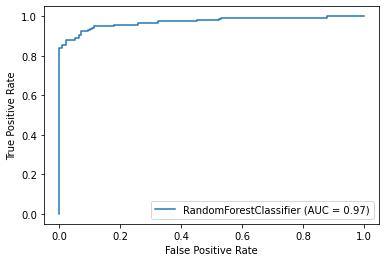

In [47]:
plot_roc_curve(Rf, X_test, y_test)

#### Based on our five techniques presented we can conclude that the Random Forest comes best when trying to predict credit card anomality.

In [48]:

Name_features=X.columns
FeatureImportances=pd.DataFrame(Rf.feature_importances_,index=Name_features).sort_values(by=0,axis = 0, ascending = False)

fig = px.bar(FeatureImportances.head(5)) 
fig.show()

The bar chart above, highlights the features which greatly influence anomality based on our random forest results. V12 and V10 are of those of highest influence which was previously identified above in our correlation test.